In [1]:
from radiomics import firstorder, getTestCase, glcm, glrlm, glszm, imageoperations, shape
# from radiomics import glrlm
import SimpleITK as sitk
from matplotlib import pyplot as plt
import numpy as np

In [2]:
arr = np.zeros((552,684),"uint8")
size = (32,32)
roi_pos = [
        (160,230),
    ]

count = 1

for start in roi_pos: 
    arr[start[0]:start[0]+size[0],start[1]:start[1]+size[1]] = count
    count+=1

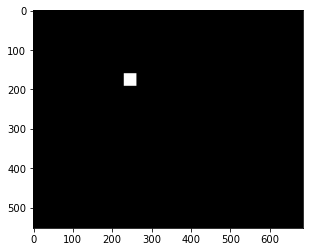

In [3]:
plt.imshow(arr, cmap='gray')

In [4]:
def extract_roi(img, start , size = (32,32)):
    img = sitk.GetArrayFromImage(img)
    roi = img[start[0]:start[0]+size[0],start[1]:start[1]+size[1]]
    mask = np.zeros(img.shape)
    mask[start[0]:start[0]+size[0],start[1]:start[1]+size[1]] = 1
    return roi, mask

In [5]:
filepath = "dataset/train/fatty/b1.jpg"

image = sitk.ReadImage(filepath, sitk.sitkUInt8)

In [6]:
roi, mask = extract_roi(image, (160,230))

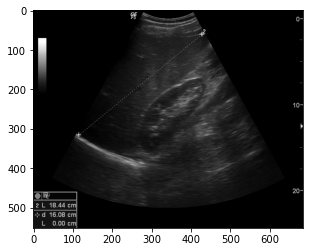

In [7]:
plt.imshow(sitk.GetArrayFromImage(image), cmap='gray')

In [8]:
mask = sitk.GetImageFromArray(mask)

In [9]:
%%time
glrlmFeatures = glrlm.RadiomicsGLRLM(image, mask)
glrlmFeatures.enableAllFeatures()

results = glrlmFeatures.execute()

print('Calculated GLRLM features: ')
for col in results.keys():
    print("  ",col," ",results[col])

Calculated GLRLM features: 
   GrayLevelNonUniformity   115.65513275115443
   GrayLevelNonUniformityNormalized   0.5036523624039525
   GrayLevelVariance   0.24817381879802375
   HighGrayLevelRunEmphasis   2.3752322658894514
   LongRunEmphasis   58.572384181765244
   LongRunHighGrayLevelEmphasis   73.73388031320272
   LongRunLowGrayLevelEmphasis   54.78201014890588
   LowGrayLevelRunEmphasis   0.6561919335276372
   RunEntropy   3.9972500065103813
   RunLengthNonUniformity   46.37757080251557
   RunLengthNonUniformityNormalized   0.1844992140588611
   RunPercentage   0.22412109375
   RunVariance   31.19889803687605
   ShortRunEmphasis   0.39208195912756605
   ShortRunHighGrayLevelEmphasis   1.129051901493104
   ShortRunLowGrayLevelEmphasis   0.20783947353618157
Wall time: 53.3 ms


In [10]:
glcmFeatures = glcm.RadiomicsGLCM(image, mask)
glcmFeatures.enableAllFeatures()

results = glcmFeatures.execute()

print('Calculated GLCM features: ')
for col in results.keys():
    print("  ",col," ",results[col])

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculated GLCM features: 
   Autocorrelation   1.6016112773152966
   ClusterProminence   0.8181677802310308
   ClusterShade   0.4636792388405961
   ClusterTendency   0.5251347912698892
   Contrast   0.18685776534859522
   Correlation   0.47563547630610403
   DifferenceAverage   0.18685776534859522
   DifferenceEntropy   0.679460671531879
   DifferenceVariance   0.14897189198112104
   Id   0.9065711173257025
   Idm   0.9065711173257025
   Idmn   0.9626284469302809
   Idn   0.9377140782171349
   Imc1   -0.20829607982708348
   Imc2   0.49452281634098927
   InverseVariance   0.18685776534859522
   JointAverage   1.2316800533298646
   JointEnergy   0.4950318297096368
   JointEntropy   1.3994466434599753
   MCC   0.4756354763061037
   MaximumProbability   0.6748910639958376
   SumAverage   2.4633601066597297
   SumEntropy   1.2125888781113803
   SumSquares   0.17799813915462112


In [11]:
firstOrderFeatures = firstorder.RadiomicsFirstOrder(image, mask)

# firstOrderFeatures.enableFeatureByName('Mean', True)
firstOrderFeatures.enableAllFeatures()

results = firstOrderFeatures.execute()

print('Calculated first order features: ')
for col in results.keys():
    print("  ",col," ",results[col])

Calculated first order features: 
   10Percentile   17.0
   90Percentile   28.0
   Energy   498248.0
   Entropy   0.7855602922535465
   InterquartileRange   6.0
   Kurtosis   3.079590927020715
   Maximum   38.0
   MeanAbsoluteDeviation   3.3584747314453125
   Mean   21.6796875
   Median   21.0
   Minimum   14.0
   Range   24.0
   RobustMeanAbsoluteDeviation   2.7791756073297096
   RootMeanSquared   22.058338842714335
   Skewness   0.6979299279441953
   TotalEnergy   498248.0
   Uniformity   0.64111328125
   Variance   16.561462402343754
